In [38]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('C:\\Users\\divya\\OneDrive\\Desktop\\HealthCareApp\\HealthCareApp\\Data\\liver.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<AxesSubplot:>

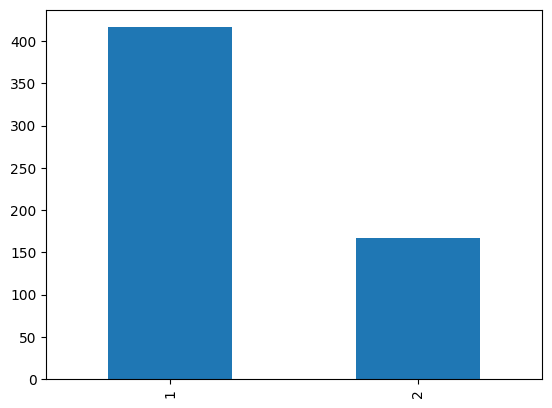

In [40]:
df['Dataset'].value_counts().plot(kind="bar")

In [41]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [42]:
df['Gender'] = df['Gender'].replace(to_replace={'Female':0, 'Female\n':0, 'Male':1, 'Male\n':1})
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<AxesSubplot:>

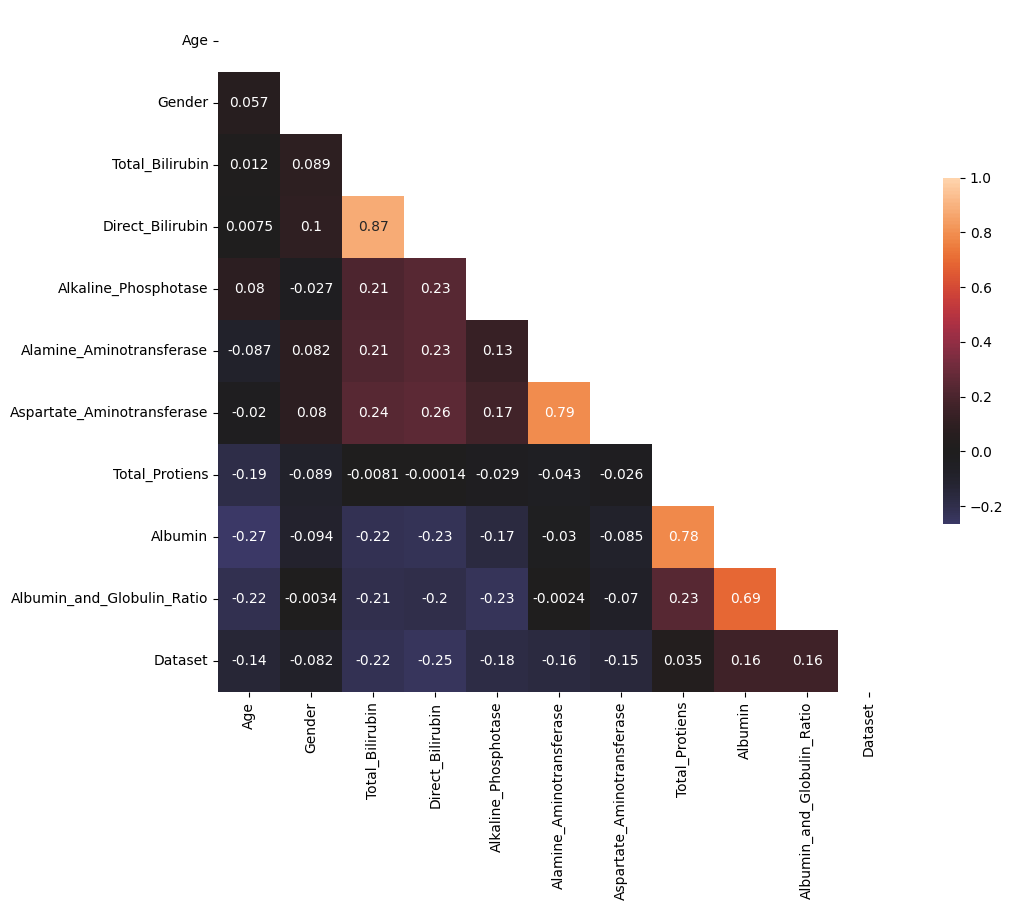

In [43]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1.0, center=0,
            square=True, cbar_kws={"shrink": .5}, annot = True)

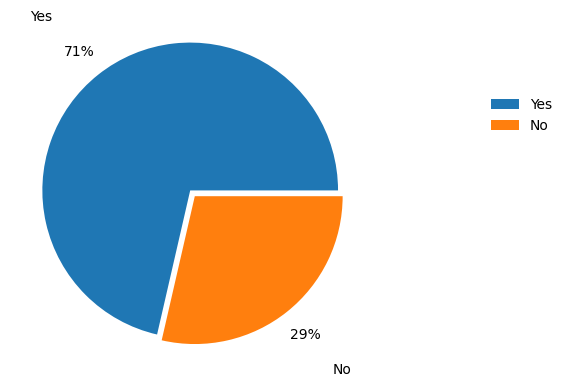

In [44]:
fig, ax = plt.subplots()

labels = ['Yes', 
         'No']
percentages = [41700/583, 16700/583]
explode=(0.05,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.5)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [45]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [46]:
X = df.drop(['Dataset','Albumin_and_Globulin_Ratio'], axis=1)
y = df['Dataset']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , stratify=y, random_state=1)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(466, 9), y:(466,)
Shape test set: X:(117, 9), y:(117,)


In [48]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 72.10%
_______________________________________________
F1 Score: 0.83
_______________________________________________
CLASSIFICATION REPORT:
                    1           2  accuracy   macro avg  weighted avg
precision    0.737705    0.538462   0.72103    0.638083      0.680839
recall       0.945946    0.157895   0.72103    0.551920      0.721030
f1-score     0.828947    0.244186   0.72103    0.536567      0.662052
support    333.000000  133.000000   0.72103  466.000000    466.000000
_______________________________________________
Confusion Matrix: 
 [[315  18]
 [112  21]]


Test Result:
Accuracy Score: 70.94%
_______________________________________________
F1 Score: 0.82
_______________________________________________
CLASSIFICATION REPORT:
                   1          2  accuracy   macro avg  weighted avg
precision   0.728972   0.500000  0.709402    0.614486      0.662433
recall      0.939759   0.147059  0.709402    0.543409      0.709402
f1-score    

In [50]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               1      2  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    333.0  133.0       1.0      466.0         466.0
_______________________________________________
Confusion Matrix: 
 [[333   0]
 [  0 133]]


Test Result:
Accuracy Score: 60.68%
_______________________________________________
F1 Score: 0.73
_______________________________________________
CLASSIFICATION REPORT:
                   1          2  accuracy   macro avg  weighted avg
precision   0.707865   0.285714  0.606838    0.496790      0.585189
recall      0.759036   0.235294  0.606838    0.497165      0.606838
f1-score    0.732558   0.258065  0.606838    0.495311      0.594671

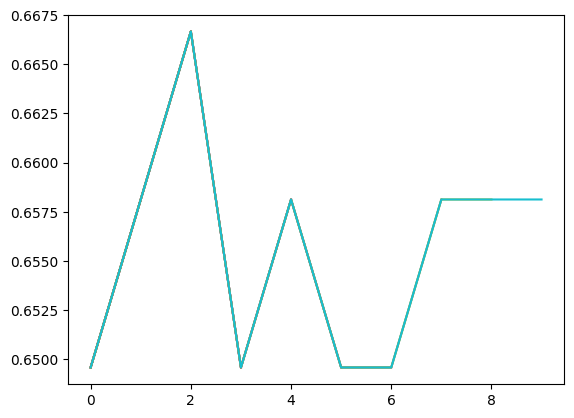

In [59]:
from sklearn.ensemble import RandomForestClassifier
## Finding out the right number of estimators
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
    plt.plot(accuracy_scores)
    

In [57]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 87.77%
_______________________________________________
F1 Score: 0.92
_______________________________________________
CLASSIFICATION REPORT:
                    1           2  accuracy   macro avg  weighted avg
precision    0.867021    0.922222  0.877682    0.894622      0.882776
recall       0.978979    0.624060  0.877682    0.801520      0.877682
f1-score     0.919605    0.744395  0.877682    0.832000      0.869599
support    333.000000  133.000000  0.877682  466.000000    466.000000
_______________________________________________
Confusion Matrix: 
 [[326   7]
 [ 50  83]]


Test Result:
Accuracy Score: 67.52%
_______________________________________________
F1 Score: 0.8
_______________________________________________
CLASSIFICATION REPORT:
                   1          2  accuracy   macro avg  weighted avg
precision   0.706422   0.250000  0.675214    0.478211      0.573787
recall      0.927711   0.058824  0.675214    0.493267      0.675214
f1-score    0

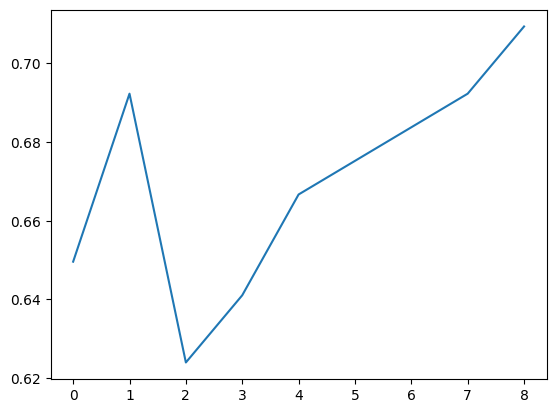

In [53]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 79.83%
_______________________________________________
F1 Score: 0.87
_______________________________________________
CLASSIFICATION REPORT:
                    1           2  accuracy   macro avg  weighted avg
precision    0.792176    0.842105  0.798283    0.817141      0.806426
recall       0.972973    0.360902  0.798283    0.666938      0.798283
f1-score     0.873315    0.505263  0.798283    0.689289      0.768270
support    333.000000  133.000000  0.798283  466.000000    466.000000
_______________________________________________
Confusion Matrix: 
 [[324   9]
 [ 85  48]]

Test Result:
Accuracy Score: 64.10%
_______________________________________________
F1 Score: 0.77
_______________________________________________
CLASSIFICATION REPORT:
                   1          2  accuracy   macro avg  weighted avg
precision   0.699029   0.214286  0.641026    0.456657      0.558164
recall      0.867470   0.088235  0.641026    0.477853      0.641026
f1-score    0

In [55]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

In [56]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,72.10,70.94
Decision Tree Classifier,100.00,60.68
Random Forest Classifier,100.00,65.81
K-Nearest Neighbor,79.83,64.10


In [60]:

y_pred = lr.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

clf_report = classification_report(y_test, y_pred)
print('Classification report')
print("---------------------")
print(clf_report)
print("_____________________")

joblib.dump(lr,r"C:\\Users\\divya\\OneDrive\\Desktop\\HealthCareApp\\HealthCareApp\\liverApi\\liver.pkl")

Accuracy : 0.7094017094017094
Classification report
---------------------
              precision    recall  f1-score   support

           1       0.73      0.94      0.82        83
           2       0.50      0.15      0.23        34

    accuracy                           0.71       117
   macro avg       0.61      0.54      0.52       117
weighted avg       0.66      0.71      0.65       117

_____________________


['C:\\\\Users\\\\divya\\\\OneDrive\\\\Desktop\\\\HealthCareApp\\\\HealthCareApp\\\\liverApi\\\\liver.pkl']